In [427]:
import numpy as np
import pandas as pd

In [428]:
df = pd.read_csv('spam.csv', encoding='latin1')


In [429]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3904,spam,Do you want a new video handset? 750 anytime a...,NaN,NaN,NaN
2941,ham,"Hello. No news on job, they are making me wait...",NaN,NaN,NaN
1269,ham,"Tee hee. Off to lecture, cheery bye bye.",NaN,NaN,NaN
628,spam,New TEXTBUDDY Chat 2 horny guys in ur area 4 j...,NaN,NaN,NaN
2105,ham,I fetch yun or u fetch?,NaN,NaN,NaN


##Data Cleaning

In [430]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [431]:
# drop last three columns
columns_to_drop = [col for col in df.columns if 'Unnamed' in col]
df = df.drop(columns=columns_to_drop)


In [432]:
df.sample(5)

,v1,v2
5178,spam,SMS AUCTION - A BRAND NEW Nokia 7250 is up 4 a...
5332,ham,I think steyn surely get one wicket:)
4394,ham,"Only just got this message, not ignoring you. ..."
4257,ham,I am late. I will be there at
368,ham,Wat uniform? In where get?


In [433]:
columns_to_rename = {'v1': 'target', 'v2': 'text'}
df.rename(columns={k: v for k, v in columns_to_rename.items() if k in df.columns}, inplace=True)

In [434]:
df.sample(5)

,target,text
1258,ham,Honey boo I'm missing u.
5024,ham,I was gonna ask you lol but i think its at 7
129,ham,K..k:)how much does it cost?
724,ham,The world is running and i am still.maybe all ...
5294,spam,XMAS iscoming & ur awarded either å£500 CD gif...


In [435]:
# Applying Label Encoder to categorize ham and spam in target column
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [436]:
df['target'] = encoder.fit_transform(df['target'])

In [437]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [438]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [439]:
# checking for duplicate values
df.duplicated().sum()

np.int64(403)

In [440]:
df = df.drop_duplicates(keep='first')

In [441]:
df.duplicated().sum()

np.int64(0)

In [442]:
df.shape

(5169, 2)

##EDA

In [443]:
#checking count of ham and spam
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

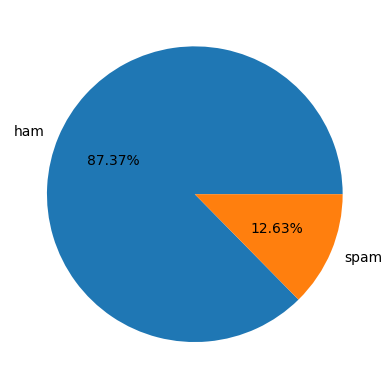

In [444]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f%%')
plt.show()

In [445]:
# The pie chart clearly shows that the Data is imbalanced
import nltk

In [446]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ab54253\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [447]:
#counting sms characters
df['num_characters'] = df['text'].apply(len)

In [448]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [449]:
#counting number of words in sms
nltk.download('punkt_tab')
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ab54253\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [450]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [451]:
#counting number of sentences
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [452]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [453]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [454]:
#analyzing the ham and spam individually
#ham messages
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [455]:
#spam messages
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


#The above data for ham and spam clearly shows that both are different in terms of number of characters, words and sentences. Spam messages are longer than ham messages.

In [456]:
#plotting the ham and spam messages using histogram
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

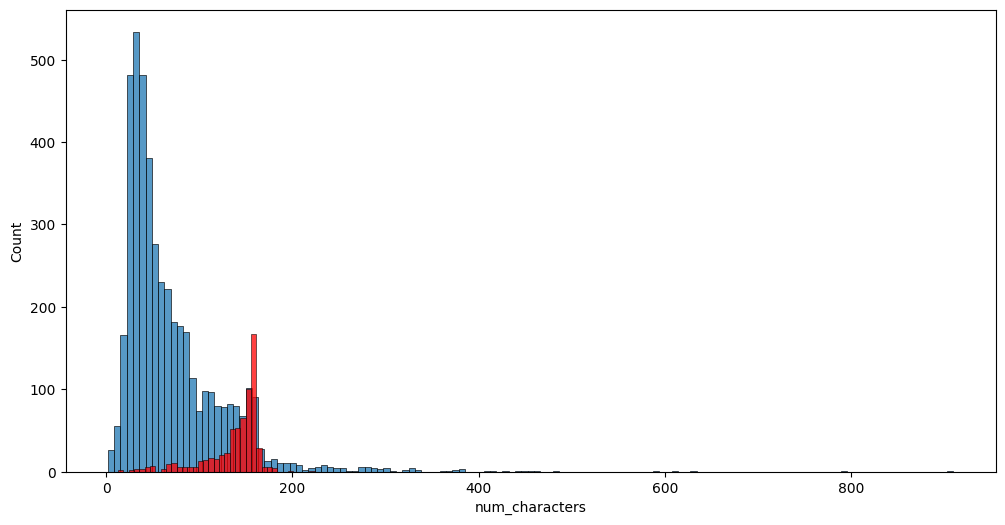

In [457]:
#for num_characters
plt.figure(figsize=(12, 6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

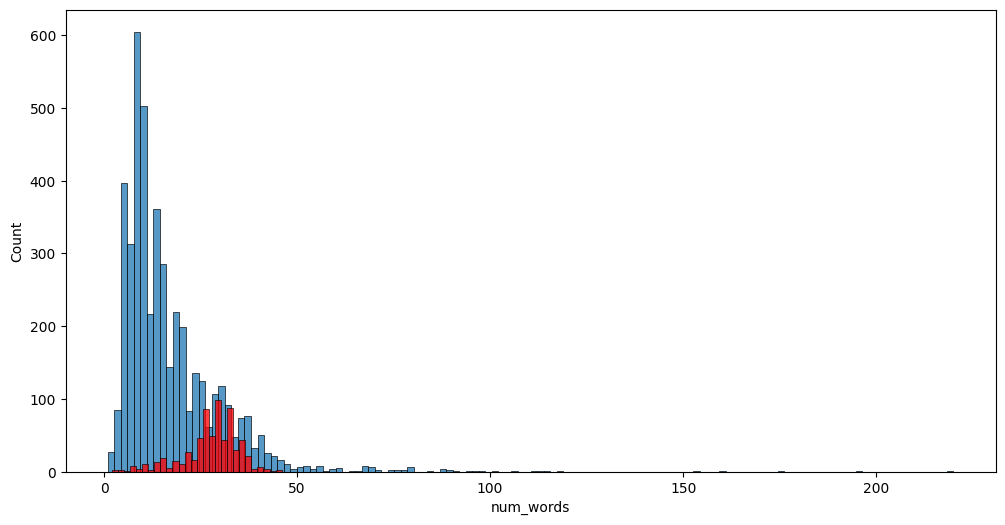

In [458]:
#for num_words
plt.figure(figsize=(12, 6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

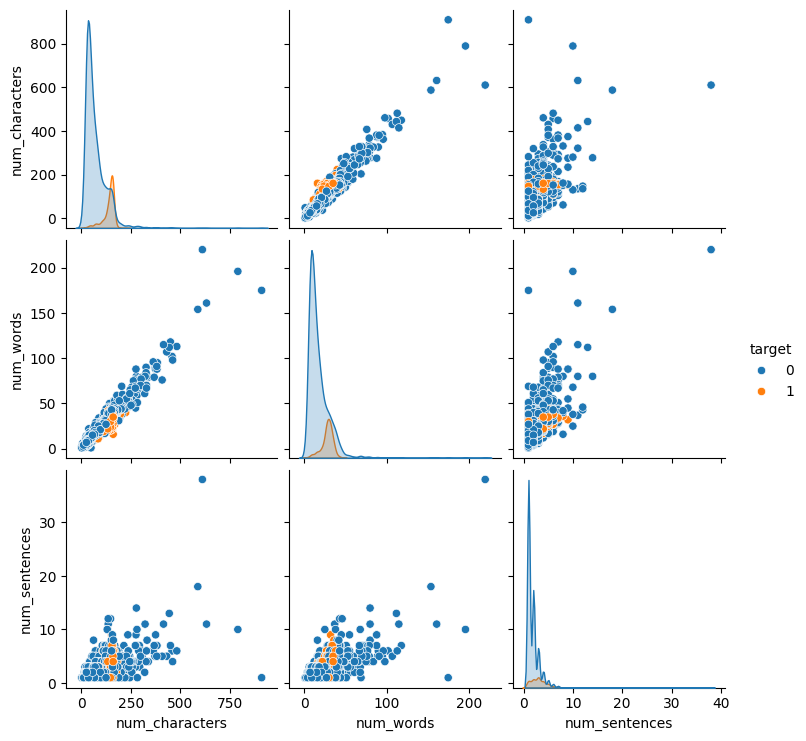

In [459]:
#checking the relationship between the number of characters, number of words and number of sentences
sns.pairplot(df, hue='target', vars=['num_characters', 'num_words', 'num_sentences'])

In [460]:
#checking correlation between the number of characters, number of words and number of sentences
df[['num_characters', 'num_words', 'num_sentences']].corr()


,num_characters,num_words,num_sentences
num_characters,1.000000,0.965760,0.624139
num_words,0.965760,1.000000,0.679971
num_sentences,0.624139,0.679971,1.000000


<Axes: >

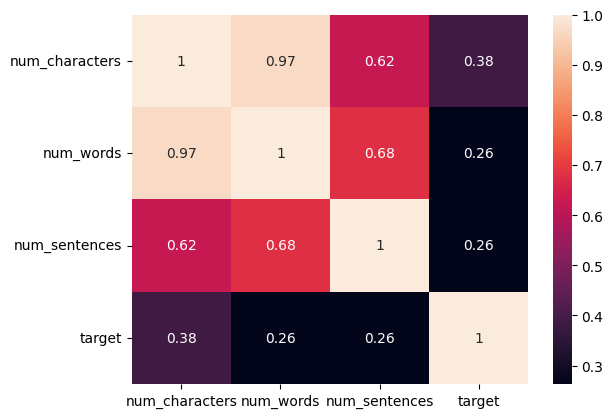

In [461]:
#correlation of the number of characters, number of words and number of sentences with target

sns.heatmap(df[['num_characters', 'num_words', 'num_sentences','target']].corr(), annot=True)

##preprocessing the text data like 

    1. Lower case
    2. Tokenization
    3. Removing special characters
    4. Removing stop words and punctuation
    5. Stemming

In [5]:
import string
import nltk
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
string.punctuation
nltk.download('stopwords')
def transform_text(text):
    punctuation = set(string.punctuation)
    text = text.lower()
    text = nltk.word_tokenize(text)
    text = [word for word in text if word is alnum()]
    stopwords = nltk.corpus.stopwords.words('english')
    text = [word for word in text if word is alnum() and word not in stopwords and word not in punctuation]
    #apply stemming
    text = [ps.stem(word) for word in text]
    return " " .join(text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ab54253\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [463]:
transform_text("Hi there, how are you Ashish? I hope you are doing well!")

'hi ashish hope well'

In [464]:
df['transformed_text'] = df['text'].apply(transform_text)

In [465]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


#Now we will be using transformed_text column and target column for further processing

In [466]:
#now let us make a word cloud for the ham and spam messages
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [467]:
#generate word cloud for spam messages
spam_wc = wc.generate(" ".join(df[df['target'] == 1]['transformed_text']))

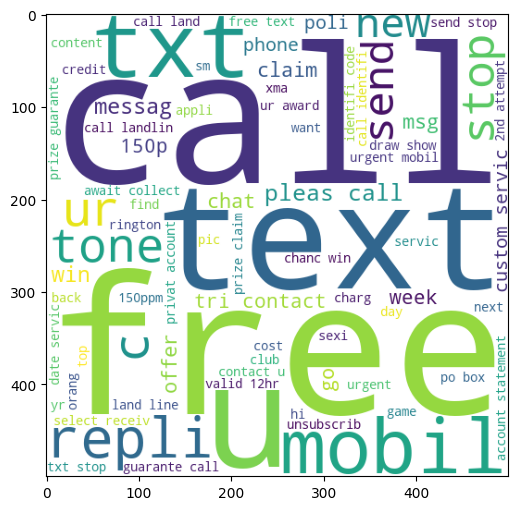

In [468]:
plt.figure(figsize=(15, 6))
plt.imshow(spam_wc)

In [469]:
#generate word cloud for ham messages
ham_wc = wc.generate(" ".join(df[df['target'] == 0]['transformed_text']))

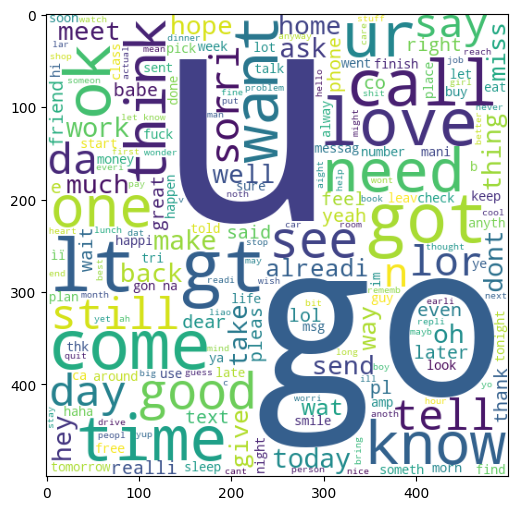

In [470]:
plt.figure(figsize=(15, 6))
plt.imshow(ham_wc)

In [471]:
#let us see top 30 words in ham and spam messages
from collections import Counter
spam_words = Counter(" ".join(df[df['target'] == 1]['transformed_text']).split()).most_common(30)
spam_words = pd.DataFrame(spam_words, columns=['word', 'count'])

In [472]:
spam_words

,word,count
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


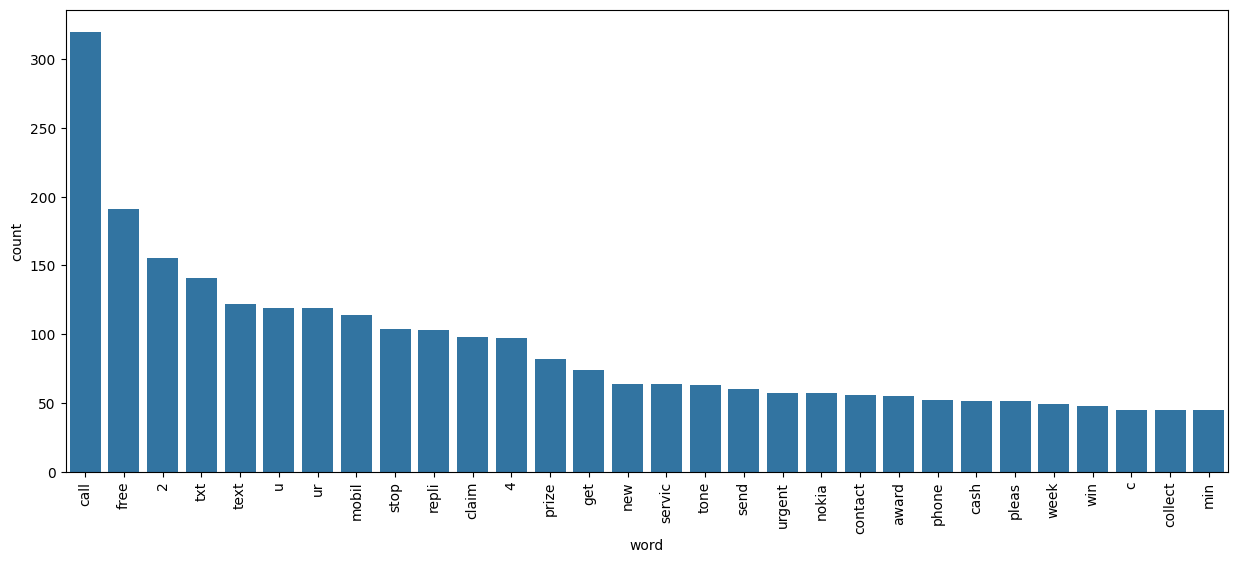

In [473]:
#let us plot the top 30 spam words over a bar plot
plt.figure(figsize=(15, 6))
sns.barplot(x='word', y='count', data=spam_words)
plt.xticks(rotation='vertical')
plt.show()

In [474]:
from collections import Counter
ham_words = Counter(" ".join(df[df['target'] == 0]['transformed_text']).split()).most_common(30)
ham_words = pd.DataFrame(ham_words, columns=['word', 'count'])

In [475]:
ham_words

,word,count
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


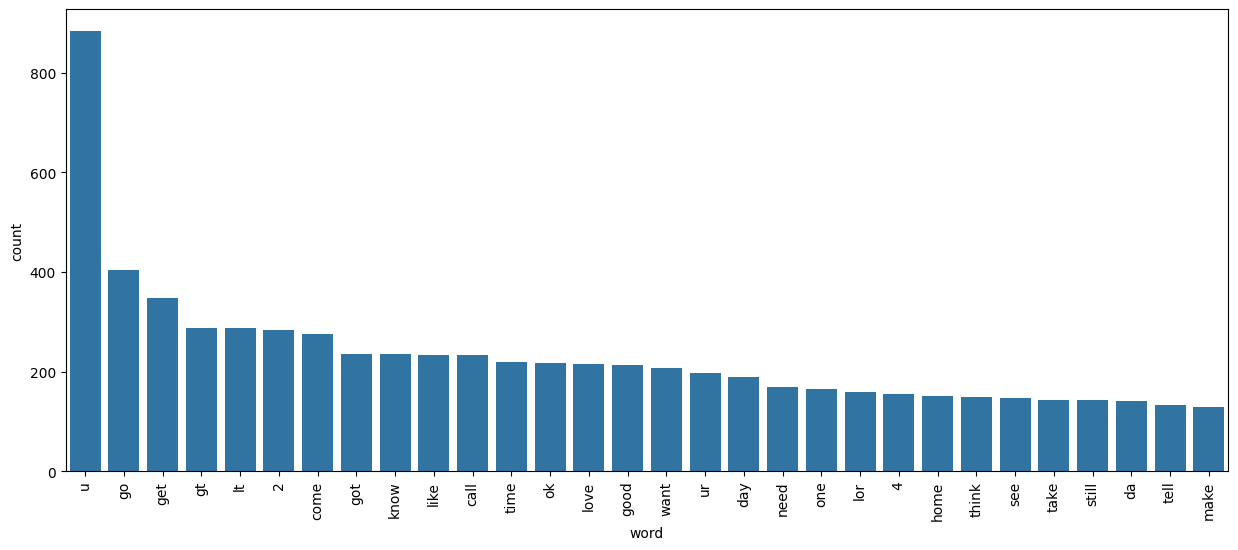

In [476]:
#let us plot the top 30 ham words over a bar plot
plt.figure(figsize=(15, 6))
sns.barplot(x='word', y='count', data=ham_words)
plt.xticks(rotation='vertical')
plt.show()

##Model Building using Naive Bayes

In [477]:
# #let us vecorize the transformed text using bag of words
# from sklearn.feature_extraction.text import CountVectorizer
# cv = CountVectorizer()

In [478]:
# X =  cv.fit_transform(df['transformed_text']).toarray()

In [479]:
# y = df['target'].values

In [480]:
# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [481]:
# from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
# from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
# gnb = GaussianNB()
# mnb = MultinomialNB()
# bnb = BernoulliNB()

In [482]:
# gnb.fit(X_train,y_train)
# y_pred1 = gnb.predict(X_test)
# print('Accuracy of GaussianNB:',accuracy_score(y_test,y_pred1))
# print('Confusion Matrix of GaussianNB:',confusion_matrix(y_test,y_pred1))
# print('Precision Score of GaussianNB:',precision_score(y_test,y_pred1))

In [483]:
# mnb.fit(X_train,y_train)
# y_pred2 = mnb.predict(X_test)
# print('Accuracy of MultinomialNB:',accuracy_score(y_test,y_pred2))
# print('Confusion Matrix of MultinomialNB:',confusion_matrix(y_test,y_pred2))
# print('Precision Score of MultinomialNB:',precision_score(y_test,y_pred2))

In [484]:
# bnb.fit(X_train,y_train)
# y_pred3 = bnb.predict(X_test)
# print('Accuracy of BernoulliNB:',accuracy_score(y_test,y_pred3))
# print('Confusion Matrix of BernoulliNB:',confusion_matrix(y_test,y_pred3))
# print('Precision Score of BernoulliNB:',precision_score(y_test,y_pred3))

In [485]:
#let us vecorize the transformed text using tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [531]:
X =  tfidf.fit_transform(df['transformed_text']).toarray()
print(X.shape)

(5169, 3000)


In [532]:
y = df['target'].values

In [533]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [534]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [490]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print('Accuracy of GaussianNB:',accuracy_score(y_test,y_pred1))
print('Confusion Matrix of GaussianNB:',confusion_matrix(y_test,y_pred1))
print('Precision Score of GaussianNB:',precision_score(y_test,y_pred1))

Accuracy of GaussianNB: 0.8762088974854932
Confusion Matrix of GaussianNB: [[793 103]
 [ 25 113]]
Precision Score of GaussianNB: 0.5231481481481481


In [535]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print('Accuracy of MultinomialNB:',accuracy_score(y_test,y_pred2))
print('Confusion Matrix of MultinomialNB:',confusion_matrix(y_test,y_pred2))
print('Precision Score of MultinomialNB:',precision_score(y_test,y_pred2))

Accuracy of MultinomialNB: 0.9709864603481625
Confusion Matrix of MultinomialNB: [[896   0]
 [ 30 108]]
Precision Score of MultinomialNB: 1.0


In [492]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print('Accuracy of BernoulliNB:',accuracy_score(y_test,y_pred3))
print('Confusion Matrix of BernoulliNB:',confusion_matrix(y_test,y_pred3))
print('Precision Score of BernoulliNB:',precision_score(y_test,y_pred3))

Accuracy of BernoulliNB: 0.9700193423597679
Confusion Matrix of BernoulliNB: [[893   3]
 [ 28 110]]
Precision Score of BernoulliNB: 0.9734513274336283


#Based on vectorization technique we can clearly see that when using tfidf over bag of words the precision for Multinomial Naive Bayes model is performing really well with 100% precision so we will go with tfidf with multinomial naive bayes.

In [493]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [494]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [495]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}

In [496]:
def train_classifier(clfs, X_train, y_train, X_test, y_test):
    clfs.fit(X_train, y_train)
    y_pred = clfs.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return accuracy, precision

In [497]:
train_classifier(svc, X_train, y_train, X_test, y_test)

(0.9729206963249516, np.float64(0.9741379310344828))

In [498]:
accuracy_scores = []
precision_scores = []
#train all classifiers mentioned in clfs
for name,clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    print('Accuracy of '+name+ ' is '+str(current_accuracy))
    print('Precision of '+name+ ' is '+str(current_precision))
    # print('Confusion Matrix of '+name+ ' is '+str(confusion_matrix(y_test,clf.predict(X_test))))

Accuracy of SVC is 0.9729206963249516
Precision of SVC is 0.9741379310344828
Accuracy of KN is 0.9003868471953579
Precision of KN is 1.0
Accuracy of NB is 0.9593810444874274
Precision of NB is 1.0
Accuracy of DT is 0.9352030947775629
Precision of DT is 0.8380952380952381
Accuracy of LR is 0.9516441005802708
Precision of LR is 0.94
Accuracy of RF is 0.971953578336557
Precision of RF is 1.0


c:\Source Code Repo\ML_Usecases\SMS-Email-Spam-Classifier\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy of AdaBoost is 0.9613152804642167
Precision of AdaBoost is 0.9454545454545454
Accuracy of BgC is 0.9584139264990329
Precision of BgC is 0.8625954198473282
Accuracy of ETC is 0.9729206963249516
Precision of ETC is 0.9824561403508771
Accuracy of GBDT is 0.9526112185686654
Precision of GBDT is 0.9238095238095239
Accuracy of xgb is 0.9729206963249516
Precision of xgb is 0.9435483870967742


In [499]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores})

In [500]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.972921,0.974138
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
3,DT,0.935203,0.838095
4,LR,0.951644,0.940000
5,RF,0.971954,1.000000
6,AdaBoost,0.961315,0.945455
7,BgC,0.958414,0.862595
8,ETC,0.972921,0.982456
9,GBDT,0.952611,0.923810


In [501]:
#sorting the dataframe based on accuracy column
performance_accuracy_df = performance_df.sort_values('Accuracy', ascending=False)
performance_accuracy_df

,Algorithm,Accuracy,Precision
0,SVC,0.972921,0.974138
8,ETC,0.972921,0.982456
10,xgb,0.972921,0.943548
5,RF,0.971954,1.000000
6,AdaBoost,0.961315,0.945455
2,NB,0.959381,1.000000
7,BgC,0.958414,0.862595
9,GBDT,0.952611,0.923810
4,LR,0.951644,0.940000
3,DT,0.935203,0.838095


In [502]:
#sorting the dataframe based on precision column
performance_precision_df = performance_df.sort_values('Precision', ascending=False)
performance_precision_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.971954,1.000000
8,ETC,0.972921,0.982456
0,SVC,0.972921,0.974138
6,AdaBoost,0.961315,0.945455
10,xgb,0.972921,0.943548
4,LR,0.951644,0.940000
9,GBDT,0.952611,0.923810
7,BgC,0.958414,0.862595


In [503]:
performance_df1 = pd.melt(performance_df, id_vars='Algorithm', value_vars=['Accuracy', 'Precision'], var_name='Metric', value_name='Value')

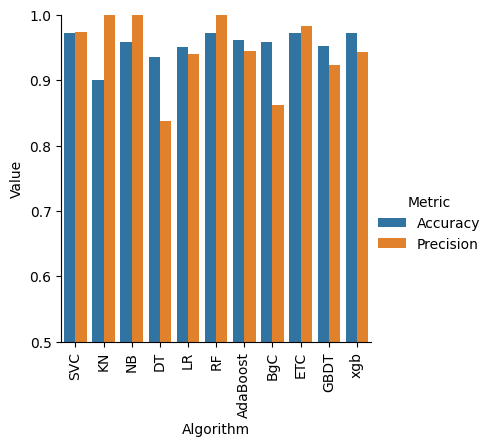

In [504]:
#plot the performance_df1 using catplot
sns.catplot(x='Algorithm', y='Value', hue='Metric', data=performance_df1, kind='bar', height=4)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

##Precision and Accuracy for Random Forest, Naive Bayes and KNN having very good precision.

#Let us try to improve the performance of the model
    ##let us change the max_features parameter of TfidfVectorizer
    ###initially when we imported tfidf vectorizer class, it has a hidden parameter called max_features. This helps us to restrict number of words by using this.

In [505]:
#let us vecorize the transformed text using tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)
X =  tfidf.fit_transform(df['transformed_text']).toarray()
print(X.shape)
y = df['target'].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print('Accuracy of GaussianNB:',accuracy_score(y_test,y_pred1))
print('Confusion Matrix of GaussianNB:',confusion_matrix(y_test,y_pred1))
print('Precision Score of GaussianNB:',precision_score(y_test,y_pred1))
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print('Accuracy of MultinomialNB:',accuracy_score(y_test,y_pred2))
print('Confusion Matrix of MultinomialNB:',confusion_matrix(y_test,y_pred2))
print('Precision Score of MultinomialNB:',precision_score(y_test,y_pred2))
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print('Accuracy of BernoulliNB:',accuracy_score(y_test,y_pred3))
print('Confusion Matrix of BernoulliNB:',confusion_matrix(y_test,y_pred3))
print('Precision Score of BernoulliNB:',precision_score(y_test,y_pred3))
#Based on vectorization technique we can clearly see that when using tfidf over bag of words the precision for Multinomial Naive Bayes model is performing really well with 100% precision so we will go with tfidf with multinomial naive bayes.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}
def train_classifier(clfs, X_train, y_train, X_test, y_test):
    clfs.fit(X_train, y_train)
    y_pred = clfs.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return accuracy, precision
train_classifier(svc, X_train, y_train, X_test, y_test)
accuracy_scores = []
precision_scores = []
#train all classifiers mentioned in clfs
for name,clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    print('Accuracy of '+name+ ' is '+str(current_accuracy))
    print('Precision of '+name+ ' is '+str(current_precision))

(5169, 3000)
Accuracy of GaussianNB: 0.8733075435203095
Confusion Matrix of GaussianNB: [[790 106]
 [ 25 113]]
Precision Score of GaussianNB: 0.5159817351598174
Accuracy of MultinomialNB: 0.9709864603481625
Confusion Matrix of MultinomialNB: [[896   0]
 [ 30 108]]
Precision Score of MultinomialNB: 1.0
Accuracy of BernoulliNB: 0.9835589941972921
Confusion Matrix of BernoulliNB: [[895   1]
 [ 16 122]]
Precision Score of BernoulliNB: 0.991869918699187
Accuracy of SVC is 0.9758220502901354
Precision of SVC is 0.9747899159663865
Accuracy of KN is 0.9052224371373307
Precision of KN is 1.0
Accuracy of NB is 0.9709864603481625
Precision of NB is 1.0
Accuracy of DT is 0.9303675048355899
Precision of DT is 0.8367346938775511
Accuracy of LR is 0.9564796905222437
Precision of LR is 0.9696969696969697
Accuracy of RF is 0.97678916827853
Precision of RF is 0.975


c:\Source Code Repo\ML_Usecases\SMS-Email-Spam-Classifier\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy of AdaBoost is 0.9690522243713733
Precision of AdaBoost is 0.9732142857142857
Accuracy of BgC is 0.9593810444874274
Precision of BgC is 0.8692307692307693
Accuracy of ETC is 0.9777562862669246
Precision of ETC is 0.967479674796748
Accuracy of GBDT is 0.9506769825918762
Precision of GBDT is 0.9306930693069307
Accuracy of xgb is 0.9680851063829787
Precision of xgb is 0.9338842975206612


In [506]:
temp_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy_max_ft_3000': accuracy_scores, 'Precision_max_ft_3000': precision_scores})

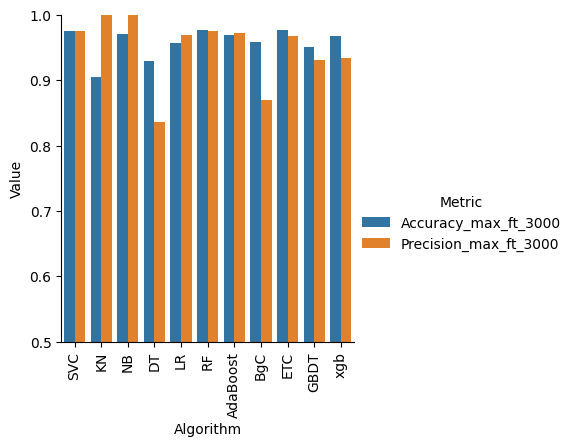

In [507]:
temp_df1 = pd.melt(temp_df, id_vars='Algorithm', value_vars=['Accuracy_max_ft_3000', 'Precision_max_ft_3000'], var_name='Metric', value_name='Value')
#plot the performance_df1 using catplot
sns.catplot(x='Algorithm', y='Value', hue='Metric', data=temp_df1, kind='bar', height=4)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [508]:
#Showing merged result of Accuracy and Precision for both the vectorization techniques i.e. including max_features and without max_features
performance_df.merge(temp_df, on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,SVC,0.972921,0.974138,0.975822,0.974790
1,KN,0.900387,1.000000,0.905222,1.000000
2,NB,0.959381,1.000000,0.970986,1.000000
3,DT,0.935203,0.838095,0.930368,0.836735
4,LR,0.951644,0.940000,0.956480,0.969697
5,RF,0.971954,1.000000,0.976789,0.975000
6,AdaBoost,0.961315,0.945455,0.969052,0.973214
7,BgC,0.958414,0.862595,0.959381,0.869231
8,ETC,0.972921,0.982456,0.977756,0.967480
9,GBDT,0.952611,0.923810,0.950677,0.930693


##Now if you see the above result we clearly see that the accuracy for Naive Bayes has improved after introducing max_features and Precision still remains 100%. So our best model would Naive Bayes.

#now let us do scaling on the X data

In [509]:
# from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# cv = CountVectorizer()
# tfidf = TfidfVectorizer(max_features=3000)

In [510]:
# X = tfidf.fit_transform(df['transformed_text']).toarray()

In [511]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)
# #Here I am using MinMaxScaler and not StandarScaler because it gives negative values which is not good for Naive Bayes model.

In [512]:
# y = df['target'].values

In [513]:
# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [514]:
# from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
# from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [515]:
# gnb = GaussianNB()
# mnb = MultinomialNB()
# bnb = BernoulliNB()
# gnb.fit(X_train,y_train)
# y_pred1 = gnb.predict(X_test)
# print('Accuracy of GaussianNB:',accuracy_score(y_test,y_pred1))
# print('Confusion Matrix of GaussianNB:',confusion_matrix(y_test,y_pred1))
# print('Precision Score of GaussianNB:',precision_score(y_test,y_pred1))
# mnb.fit(X_train,y_train)
# y_pred2 = mnb.predict(X_test)
# print('Accuracy of MultinomialNB:',accuracy_score(y_test,y_pred2))
# print('Confusion Matrix of MultinomialNB:',confusion_matrix(y_test,y_pred2))
# print('Precision Score of MultinomialNB:',precision_score(y_test,y_pred2))
# bnb.fit(X_train,y_train)
# y_pred3 = bnb.predict(X_test)
# print('Accuracy of BernoulliNB:',accuracy_score(y_test,y_pred3))
# print('Confusion Matrix of BernoulliNB:',confusion_matrix(y_test,y_pred3))
# print('Precision Score of BernoulliNB:',precision_score(y_test,y_pred3))
# #Based on vectorization technique we can clearly see that when using tfidf over bag of words the precision for Multinomial Naive Bayes model is performing really well with 100% precision so we will go with tfidf with multinomial naive bayes.
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import BaggingClassifier
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from xgboost import XGBClassifier
# svc = SVC(kernel='sigmoid', gamma=1.0)
# knc = KNeighborsClassifier()
# mnb = MultinomialNB()
# dtc = DecisionTreeClassifier(max_depth=5)
# lrc = LogisticRegression(solver='liblinear', penalty='l1')
# rfc = RandomForestClassifier(n_estimators=50, random_state=2)
# abc = AdaBoostClassifier(n_estimators=50, random_state=2)
# bc = BaggingClassifier(n_estimators=50, random_state=2)
# etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
# gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
# xgb = XGBClassifier(n_estimators=50, random_state=2)
# clfs = {
#     'SVC' : svc,
#     'KN' : knc,
#     'NB' : mnb,
#     'DT' : dtc,
#     'LR' : lrc,
#     'RF' : rfc,
#     'AdaBoost' : abc,
#     'BgC' : bc,
#     'ETC' : etc,
#     'GBDT' : gbdt,
#     'xgb' : xgb
# }
# def train_classifier(clfs, X_train, y_train, X_test, y_test):
#     clfs.fit(X_train, y_train)
#     y_pred = clfs.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     precision = precision_score(y_test, y_pred)

#     return accuracy, precision
# train_classifier(svc, X_train, y_train, X_test, y_test)
# accuracy_scores = []
# precision_scores = []
# #train all classifiers mentioned in clfs
# for name,clf in clfs.items():
#     current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
#     accuracy_scores.append(current_accuracy)
#     precision_scores.append(current_precision)
#     print('Accuracy of '+name+ ' is '+str(current_accuracy))
#     print('Precision of '+name+ ' is '+str(current_precision))

Accuracy of GaussianNB: 0.8771760154738878
Confusion Matrix of GaussianNB: [[786 110]
 [ 17 121]]
Precision Score of GaussianNB: 0.5238095238095238
Accuracy of MultinomialNB: 0.9787234042553191
Confusion Matrix of MultinomialNB: [[889   7]
 [ 15 123]]
Precision Score of MultinomialNB: 0.9461538461538461
Accuracy of BernoulliNB: 0.9835589941972921
Confusion Matrix of BernoulliNB: [[895   1]
 [ 16 122]]
Precision Score of BernoulliNB: 0.991869918699187
Accuracy of SVC is 0.9700193423597679
Precision of SVC is 0.9349593495934959
Accuracy of KN is 0.9042553191489362
Precision of KN is 0.975609756097561
Accuracy of NB is 0.9787234042553191
Precision of NB is 0.9461538461538461
Accuracy of DT is 0.9303675048355899
Precision of DT is 0.8367346938775511
Accuracy of LR is 0.9671179883945842
Precision of LR is 0.9642857142857143
Accuracy of RF is 0.97678916827853
Precision of RF is 0.975


c:\Source Code Repo\ML_Usecases\SMS-Email-Spam-Classifier\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy of AdaBoost is 0.9690522243713733
Precision of AdaBoost is 0.9732142857142857
Accuracy of BgC is 0.9593810444874274
Precision of BgC is 0.8692307692307693
Accuracy of ETC is 0.9777562862669246
Precision of ETC is 0.967479674796748
Accuracy of GBDT is 0.9506769825918762
Precision of GBDT is 0.9306930693069307
Accuracy of xgb is 0.9680851063829787
Precision of xgb is 0.9338842975206612


In [517]:
temp_scaling_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy_Scaling': accuracy_scores, 'Precision_Scaling': precision_scores})

In [518]:
# new_scaled_df = performance_df.merge(temp_df, on='Algorithm').merge(temp_scaling_df, on='Algorithm')

In [519]:
# new_scaled_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_Scaling,Precision_Scaling
0,SVC,0.972921,0.974138,0.975822,0.974790,0.970019,0.934959
1,KN,0.900387,1.000000,0.905222,1.000000,0.904255,0.975610
2,NB,0.959381,1.000000,0.970986,1.000000,0.978723,0.946154
3,DT,0.935203,0.838095,0.930368,0.836735,0.930368,0.836735
4,LR,0.951644,0.940000,0.956480,0.969697,0.967118,0.964286
5,RF,0.971954,1.000000,0.976789,0.975000,0.976789,0.975000
6,AdaBoost,0.961315,0.945455,0.969052,0.973214,0.969052,0.973214
7,BgC,0.958414,0.862595,0.959381,0.869231,0.959381,0.869231
8,ETC,0.972921,0.982456,0.977756,0.967480,0.977756,0.967480
9,GBDT,0.952611,0.923810,0.950677,0.930693,0.950677,0.930693


#Now in the above result we can see that considering Naive Bayes algoithm, accuracy improved but precision dropped drastically. So this means that scaling the model is not going to help us. So we will comment out the scaling.

#Let us use the extra features and it as part of the X and see how model behaves

In [520]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [521]:
X = np.hstack((X, df['num_characters'].values.reshape(-1, 1)))

In [522]:
X.shape

(5169, 3001)

In [523]:
y = df['target'].values

In [524]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print('Accuracy of GaussianNB:',accuracy_score(y_test,y_pred1))
print('Confusion Matrix of GaussianNB:',confusion_matrix(y_test,y_pred1))
print('Precision Score of GaussianNB:',precision_score(y_test,y_pred1))
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print('Accuracy of MultinomialNB:',accuracy_score(y_test,y_pred2))
print('Confusion Matrix of MultinomialNB:',confusion_matrix(y_test,y_pred2))
print('Precision Score of MultinomialNB:',precision_score(y_test,y_pred2))
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print('Accuracy of BernoulliNB:',accuracy_score(y_test,y_pred3))
print('Confusion Matrix of BernoulliNB:',confusion_matrix(y_test,y_pred3))
print('Precision Score of BernoulliNB:',precision_score(y_test,y_pred3))
#Based on vectorization technique we can clearly see that when using tfidf over bag of words the precision for Multinomial Naive Bayes model is performing really well with 100% precision so we will go with tfidf with multinomial naive bayes.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}
def train_classifier(clfs, X_train, y_train, X_test, y_test):
    clfs.fit(X_train, y_train)
    y_pred = clfs.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return accuracy, precision
train_classifier(svc, X_train, y_train, X_test, y_test)
accuracy_scores = []
precision_scores = []
#train all classifiers mentioned in clfs
for name,clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    print('Accuracy of '+name+ ' is '+str(current_accuracy))
    print('Precision of '+name+ ' is '+str(current_precision))

Accuracy of GaussianNB: 0.8945841392649904
Confusion Matrix of GaussianNB: [[808  88]
 [ 21 117]]
Precision Score of GaussianNB: 0.5707317073170731
Accuracy of MultinomialNB: 0.9390715667311412
Confusion Matrix of MultinomialNB: [[896   0]
 [ 63  75]]
Precision Score of MultinomialNB: 1.0
Accuracy of BernoulliNB: 0.9835589941972921
Confusion Matrix of BernoulliNB: [[895   1]
 [ 16 122]]
Precision Score of BernoulliNB: 0.991869918699187


c:\Source Code Repo\ML_Usecases\SMS-Email-Spam-Classifier\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Source Code Repo\ML_Usecases\SMS-Email-Spam-Classifier\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy of SVC is 0.8665377176015474
Precision of SVC is 0.0
Accuracy of KN is 0.9332688588007737
Precision of KN is 0.822429906542056
Accuracy of NB is 0.9390715667311412
Precision of NB is 1.0
Accuracy of DT is 0.9477756286266924
Precision of DT is 0.8962264150943396
Accuracy of LR is 0.960348162475822
Precision of LR is 0.9619047619047619
Accuracy of RF is 0.971953578336557
Precision of RF is 0.9823008849557522


c:\Source Code Repo\ML_Usecases\SMS-Email-Spam-Classifier\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy of AdaBoost is 0.9642166344294004
Precision of AdaBoost is 0.9243697478991597
Accuracy of BgC is 0.960348162475822
Precision of BgC is 0.8592592592592593
Accuracy of ETC is 0.97678916827853
Precision of ETC is 0.975
Accuracy of GBDT is 0.9497098646034816
Precision of GBDT is 0.93
Accuracy of xgb is 0.9671179883945842
Precision of xgb is 0.940677966101695


In [525]:
temp_numchr_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy_Num_Chars': accuracy_scores, 'Precision_num_chars': precision_scores})
new_numchr_df = performance_df.merge(temp_df, on='Algorithm').merge(temp_scaling_df, on='Algorithm').merge(temp_numchr_df, on='Algorithm')

In [526]:
new_numchr_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_Scaling,Precision_Scaling,Accuracy_Num_Chars,Precision_num_chars
0,SVC,0.972921,0.974138,0.975822,0.974790,0.970019,0.934959,0.866538,0.000000
1,KN,0.900387,1.000000,0.905222,1.000000,0.904255,0.975610,0.933269,0.822430
2,NB,0.959381,1.000000,0.970986,1.000000,0.978723,0.946154,0.939072,1.000000
3,DT,0.935203,0.838095,0.930368,0.836735,0.930368,0.836735,0.947776,0.896226
4,LR,0.951644,0.940000,0.956480,0.969697,0.967118,0.964286,0.960348,0.961905
5,RF,0.971954,1.000000,0.976789,0.975000,0.976789,0.975000,0.971954,0.982301
6,AdaBoost,0.961315,0.945455,0.969052,0.973214,0.969052,0.973214,0.964217,0.924370
7,BgC,0.958414,0.862595,0.959381,0.869231,0.959381,0.869231,0.960348,0.859259
8,ETC,0.972921,0.982456,0.977756,0.967480,0.977756,0.967480,0.976789,0.975000
9,GBDT,0.952611,0.923810,0.950677,0.930693,0.950677,0.930693,0.949710,0.930000


#If we see the above result it is quite evident that appending a new feature num_characters is also not giving any benefit to our model as we can see in case of Naive bayes algo the accuracy has dropped but precision again jumped back to 100%. Same is the case with other algorithms. So we will not consider this approach.

#Now let us use voting classifiers. We will create a combination of best performing models and will check if it outperforms Naive Bayes.

In [527]:
#Voting Classifier
from sklearn.ensemble import VotingClassifier
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
vc = VotingClassifier(estimators=[('NB', mnb), ('ETC', etc), ('SVM', svc)], voting='soft')

In [528]:
vc.fit(X_train, y_train)

VotingClassifier(estimators=[('NB', MultinomialNB()),
                             ('ETC',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2)),
                             ('SVM',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True))],
                 voting='soft')

In [529]:
y_pred = vc.predict(X_test)
print('Accuracy of Voting Classifier:', accuracy_score(y_test, y_pred))
print('Precision Score of Voting Classifier:', precision_score(y_test, y_pred))

Accuracy of Voting Classifier: 0.9390715667311412
Precision Score of Voting Classifier: 1.0


In [530]:
#Let us now apply stacking
from sklearn.ensemble import StackingClassifier
estimators = [('NB', mnb), ('ETC', etc), ('SVM', svc)]
final_estimator = RandomForestClassifier()
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
clf.fit(X_train, y_train)
print('Accuracy of Stacking Classifier:', accuracy_score(y_test, y_pred))
print('Precision Score of Stacking Classifier:', precision_score(y_test, y_pred))

Accuracy of Stacking Classifier: 0.9390715667311412
Precision Score of Stacking Classifier: 1.0


#Here from the above result we can clearly see that Precision remains 100% but Accuracy is still not improved so we have finally decided to go with tfidf algo on Naive Bayes because that is best performing till now.

In [536]:
# #Let us now pickel the files
# import pickle
# pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
# pickle.dump(mnb, open('model.pkl', 'wb'))

In [6]:
#pickel export the function transform_text
import pickle
pickle.dump(transform_text, open('transform_text.pkl', 'wb'))